In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
#data set from kaggle. ATP match results from 2000-2016.

In [5]:
matches = pd.DataFrame.from_csv('data/match_history.csv',index_col=None, encoding='ISO-8859-1')
matches.head()

,atp,location,tournament,day,month,year,date,series,court,surface,...,l2,w3,l3,w4,l4,w5,l5,wsets,lsets,comment
0,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
2,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
3,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,1,Adelaide,Australian Hardcourt Championships,3,1,2000,1/3/2000,International,Outdoor,Hard,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed


### Which players has the most match wins?

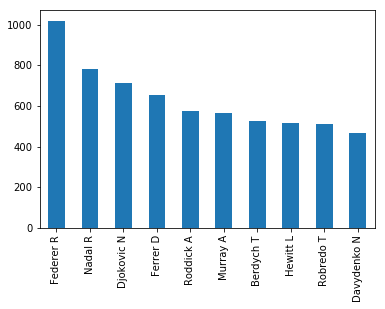

In [6]:
matches.winner.value_counts().head(10).plot(kind='bar')

In [7]:
#I am not surprised to see Federer, Nadal and Djokovic respectively with the most wins.
#I've heard sports columnist and talk show hosts refer to these players as the Big 3.

### Plot the # of wins by the Big 3 over time

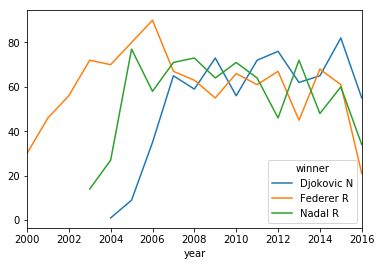

In [8]:
big3=matches[(matches.winner=='Federer R') | (matches.winner=='Nadal R') | (matches.winner=='Djokovic N')]
big3.groupby(['winner','year']).size().unstack('winner').plot(kind='line')

In [9]:
#The data set spans from 2000 to part of 2016. You can see Federer had an earlier start. From 200-2004 he had 274 wins
#From 2006-2016 wins were evenly distributed with a modeate beta value year-over-year
#Djokovic seems to be trending up, while the other two have negative slope curves

### Does surface have an affect. If yes to what advantage is it?

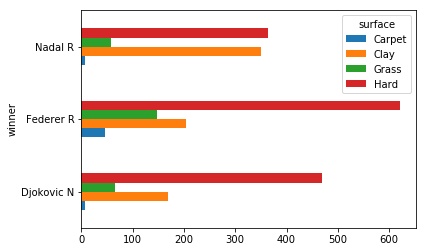

In [10]:
big3=matches[(matches.winner=='Federer R') | (matches.winner=='Nadal R') | (matches.winner=='Djokovic N')]
big3.groupby(['winner','surface']).size().unstack('surface').plot(kind='barh')

In [11]:
#Nadal is a clay court specialist
#Federer has had a higher proportion of grass court wins
#There are a larger number of hard court tournaments which favors Federer and Djokovic

### Which city has hosted the most tournaments over the last 17 years?

In [12]:
m=matches[matches.bracket_round=='Final']
m.location.value_counts().head(10)

Paris          33
London         25
Stuttgart      19
Houston        18
Sydney         18
Rome           17
Monte Carlo    17
Umag           17
New York       17
Newport        17
Name: location, dtype: int64

In [13]:
#With the exception of Paris and London, it looks like cities are not hosting more than 1 tournament a year

### What was the ATP ranking of the winner of each Grand Slam?

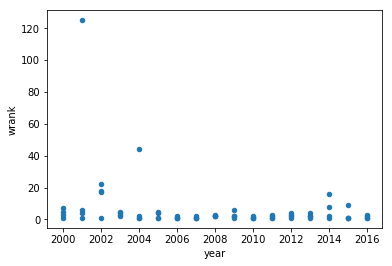

In [14]:
gs=matches[(matches.series=='Grand Slam') & (matches.bracket_round=='Final')].sort_values('wrank',ascending=False)
gs=gs[gs.wrank.notnull()]
gs.plot(x='year',y='wrank',kind='scatter')#, ylim=[0,30])

In [15]:
#There are four grand slam tournaments a year. I was curious how often an underdog won it
#With the exception of 2002 and 2014, the winners have a very tight distribution
#I wonder who these big upsets were...

In [16]:
gs.iloc[:,2:16].head(10)

,tournament,day,month,year,date,series,court,surface,bracket_round,best_of,winner,loser,wrank,lrank
4684,Wimbledon,25,6,2001,6/25/2001,Grand Slam,Outdoor,Grass,Final,5,Ivanisevic G,Rafter P,125.0,10.0
13010,French Open,6,6,2004,6/6/2004,Grand Slam,Outdoor,Clay,Final,5,Gaudio G,Coria G,44.0,3.0
7294,French Open,27,5,2002,5/27/2002,Grand Slam,Outdoor,Clay,Final,5,Costa A,Ferrero JC,22.0,11.0
6207,Australian Open,14,1,2002,1/14/2002,Grand Slam,Outdoor,Hard,Final,5,Johansson T,Safin M,18.0,11.0
8274,US Open,26,8,2002,8/26/2002,Grand Slam,Outdoor,Hard,Final,5,Sampras P,Agassi A,17.0,6.0
41368,US Open,8,9,2014,9/8/2014,Grand Slam,Outdoor,Hard,Final,5,Cilic M,Nishikori K,16.0,11.0
43126,French Open,7,6,2015,6/7/2015,Grand Slam,Outdoor,Clay,Final,5,Wawrinka S,Djokovic N,9.0,1.0
39437,Australian Open,26,1,2014,1/26/2014,Grand Slam,Outdoor,Hard,Final,5,Wawrinka S,Nadal R,8.0,1.0
2395,US Open,28,8,2000,8/28/2000,Grand Slam,Outdoor,Hard,Final,5,Safin M,Sampras P,7.0,4.0
28071,US Open,14,9,2009,9/14/2009,Grand Slam,Outdoor,Hard,Final,5,Del Potro JM,Federer R,6.0,1.0


In [17]:
#Is one of the Grand Slams better at seeding?
gs.groupby(['tournament','wrank']).size().unstack('tournament')

tournament,Australian Open,French Open,US Open,Wimbledon
wrank,,,,
1.0,9.0,4.0,7.0,7.0
2.0,2.0,6.0,2.0,6.0
3.0,2.0,1.0,1.0,2.0
4.0,1.0,1.0,3.0,NaN
5.0,NaN,2.0,NaN,1.0
6.0,1.0,NaN,1.0,NaN
7.0,NaN,NaN,1.0,NaN
8.0,1.0,NaN,NaN,NaN
9.0,NaN,1.0,NaN,NaN


In [18]:
### Show the difference between the loser and winner by year and tournament

In [19]:
gs = matches[(matches.series=='Grand Slam') & (matches.bracket_round=='Final')]
gs = gs.groupby(['tournament','year']).sum().unstack('tournament')
gs = gs.iloc[:,16:24]
(gs.lrank - gs.wrank)

tournament,Australian Open,French Open,US Open,Wimbledon
year,,,,
2000,1.0,-2.0,-3.0,18.0
2001,12.0,12.0,6.0,-115.0
2002,-7.0,-11.0,-11.0,31.0
2003,34.0,43.0,-1.0,43.0
2004,84.0,-41.0,4.0,1.0
2005,-1.0,32.0,6.0,3.0
2006,53.0,-1.0,9.0,1.0
2007,8.0,-1.0,2.0,1.0
2008,35.0,-1.0,4.0,-1.0


In [22]:
gs.stack('tournament')

lrank  wrank
year tournament                   
2000 Australian Open    2.0    1.0
     French Open        3.0    5.0
     US Open            4.0    7.0
     Wimbledon         21.0    3.0
2001 Australian Open   18.0    6.0
     French Open       13.0    1.0
     US Open           10.0    4.0
     Wimbledon         10.0  125.0
2002 Australian Open   11.0   18.0
     French Open       11.0   22.0
     US Open            6.0   17.0
     Wimbledon         32.0    1.0
2003 Australian Open   36.0    2.0
     French Open       46.0    3.0
     US Open            3.0    4.0
     Wimbledon         48.0    5.0
2004 Australian Open   86.0    2.0
     French Open        3.0   44.0
     US Open            5.0    1.0
     Wimbledon          2.0    1.0
2005 Australian Open    3.0    4.0
     French Open       37.0    5.0
     US Open            7.0    1.0
     Wimbledon          4.0    1.0
2006 Australian Open   54.0    1.0
     French Open        1.0    2.0
     US Open           10.0    1.0
     Wimbledon          2.0    1.0
2007 Australian Open    9.0    1.0
     French Open        1.0    2.0
...                     ...    ...
2009 US Open            1.0    6.0
     Wimbledon          6.0    2.0
2010 Australian Open    4.0    1.0
     French Open        7.0    2.0
     US Open            3.0    1.0
     Wimbledon         13.0    1.0
2011 Australian Open    5.0    3.0
     French Open        3.0    1.0
     US Open            2.0    1.0
     Wimbledon          1.0    2.0
2012 Australian Open    2.0    1.0
     French Open        1.0    2.0
     US Open            2.0    4.0
     Wimbledon          4.0    3.0
2013 Australian Open    3.0    1.0
     French Open        5.0    4.0
     US Open            1.0    2.0
     Wimbledon          1.0    2.0
2014 Australian Open    1.0    8.0
     French Open        2.0    1.0
     US Open           11.0   16.0
     Wimbledon          4.0    2.0
2015 Australian Open    6.0    1.0
     French Open        1.0    9.0
     US Open            2.0    1.0
     Wimbledon          2.0    1.0
2016 Australian Open    2.0    1.0
     French Open        2.0    1.0
     US Open            1.0    3.0
     Wimbledon          7.0    2.0

[68 rows x 2 columns]

<function matplotlib.pyplot.show>

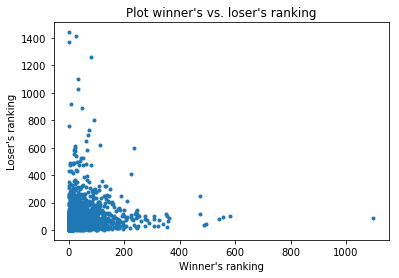

In [44]:
us_open = matches[(matches.tournament=='US Open')]
us_open.iloc[:,6:16]

plt.plot(us_open.wrank, us_open.lrank, marker='.', linewidth = 0)
plt.title("Plot winner's vs. loser's ranking")
plt.ylabel("Loser's ranking")
plt.xlabel("Winner's ranking")
plt.show

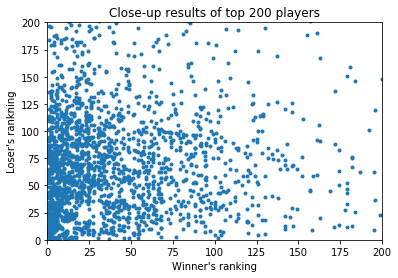

In [43]:
plt.plot(us_open.wrank, us_open.lrank, marker='.', linewidth = 0)
plt.axis([0,200,0,200])
plt.title("Close-up results of top 200 players")
plt.ylabel("Loser's rankning")
plt.xlabel("Winner's ranking")
plt.show()